In [0]:
!pip install tensorflow==2.1.0 h2o4gpu 

     |█████████████████████▏          | 278.7MB 1.2MB/s eta 0:01:58

In [0]:
import h2o4gpu as sklearn
import tensorflow as tf
import numpy as np
import pandas as pd 
import tensorflow.keras as keras
from xgboost import plot_importance as xgb_plot_importance
from lightgbm_gpu import plot_importance as lgbm_plot_importance
from xgboost import XGBClassifier, XGBRegressor
from lightgbm_gpu import LGBMClassifier, LGBMRegressor
import matplotlib.pyplot as plt

In [0]:
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.feature_selection import RFECV, RFE
from sklearn import metrics, preprocessing
from sklearn.preprocessing import LabelEncoder

In [0]:
data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/PUBG/pubg.csv")
data.info()

In [0]:
data.head()

,player_name,tracker_id,solo_KillDeathRatio,solo_WinRatio,solo_TimeSurvived,solo_RoundsPlayed,solo_Wins,solo_WinTop10Ratio,solo_Top10s,solo_Top10Ratio,solo_Losses,solo_Rating,solo_BestRating,solo_DamagePg,solo_HeadshotKillsPg,solo_HealsPg,solo_KillsPg,solo_MoveDistancePg,solo_RevivesPg,solo_RoadKillsPg,solo_TeamKillsPg,solo_TimeSurvivedPg,solo_Top10sPg,solo_Kills,solo_Assists,solo_Suicides,solo_TeamKills,solo_HeadshotKills,solo_HeadshotKillRatio,solo_VehicleDestroys,solo_RoadKills,solo_DailyKills,solo_WeeklyKills,solo_RoundMostKills,solo_MaxKillStreaks,solo_WeaponAcquired,solo_Days,solo_LongestTimeSurvived,solo_MostSurvivalTime,solo_AvgSurvivalTime,...,squad_BestRating,squad_DamagePg,squad_HeadshotKillsPg,squad_HealsPg,squad_KillsPg,squad_MoveDistancePg,squad_RevivesPg,squad_RoadKillsPg,squad_TeamKillsPg,squad_TimeSurvivedPg,squad_Top10sPg,squad_Kills,squad_Assists,squad_Suicides,squad_TeamKills,squad_HeadshotKills,squad_HeadshotKillRatio,squad_VehicleDestroys,squad_RoadKills,squad_DailyKills,squad_WeeklyKills,squad_RoundMostKills,squad_MaxKillStreaks,squad_WeaponAcquired,squad_Days,squad_LongestTimeSurvived,squad_MostSurvivalTime,squad_AvgSurvivalTime,squad_WinPoints,squad_WalkDistance,squad_RideDistance,squad_MoveDistance,squad_AvgWalkDistance,squad_AvgRideDistance,squad_LongestKill,squad_Heals,squad_Revives,squad_Boosts,squad_DamageDealt,squad_DBNOs
0,BreakNeck,4405,3.14,17.65,18469.14,17,3,0.83,4,23.5,14,1559.78,1415.79,255.36,0.65,1.94,2.59,3321.28,0,0.00,0.0,1086.42,0.24,44,1,0,0,11,0.25,0,0,13,19,13,1,0,14,1909.66,1909.66,1262.83,...,3208.69,377.15,0.50,3.40,2.86,8091.57,0.36,0.04,0.00,1657.95,0.91,1836,892,1,3,319,0.17,56,24,34,274,11,5,0,46,2328.32,2328.32,1449.03,4868,1443195.59,3751590.99,5194786.58,2626.97,4372.64,536.98,2186,234,1884,242132.73,1448
1,Blackwalk,8199,4.41,18.18,33014.86,33,6,0.36,11,33.3,27,1884.53,1860.74,393.04,1.27,1.82,3.61,5021.41,0,0.06,0.0,1000.45,0.33,119,2,0,0,42,0.35,3,2,18,18,13,3,0,10,1987.94,1987.94,1221.32,...,3170.75,373.68,0.61,2.83,3.05,8381.97,0.38,0.03,0.00,1630.18,0.89,2201,964,1,3,439,0.20,44,22,84,405,14,5,0,44,2192.81,2192.81,1570.51,4058,1755866.37,4295917.30,6051783.67,2422.48,6009.73,734.85,2041,276,2340,269795.75,1724
2,mercedes_benz,4454,3.60,0.00,4330.44,5,0,0.00,1,20.0,5,1255.92,1266.60,329.76,0.60,1.00,3.60,2804.80,0,0.00,0.0,866.09,0.20,18,1,0,0,3,0.17,0,0,1,18,10,1,0,4,1578.31,1578.31,1133.17,...,3179.38,399.70,0.59,2.41,3.20,7625.66,0.29,0.03,0.01,1591.65,0.89,2348,965,2,9,434,0.18,61,23,65,382,17,4,0,48,2328.32,2328.32,1223.28,5929,1654344.11,3935265.63,5589608.74,1871.89,3011.87,725.44,1766,210,2193,292977.07,1897
3,DORA,7729,14.00,50.00,13421.82,8,4,0.67,6,75.0,4,1798.70,1765.13,751.95,0.50,1.00,7.00,5986.82,0,0.00,0.0,1677.73,0.75,56,3,0,0,4,0.07,0,0,8,48,14,2,0,5,1980.79,1980.79,1677.73,...,3098.77,368.85,0.37,2.47,2.76,7733.03,0.29,0.04,0.01,1583.73,0.87,1354,659,1,3,180,0.13,36,21,56,56,12,5,0,38,2192.31,2192.31,1583.73,2576,1057919.00,2738998.00,3796916.00,2154.62,5578.41,587.28,1214,142,1252,181106.90,1057
4,n2tstar,0,10.50,33.33,9841.04,6,2,0.40,5,83.3,4,1668.67,1616.58,637.48,1.50,2.00,7.00,6526.96,0,0.00,0.0,1640.17,0.83,42,0,0,0,9,0.21,0,0,15,29,13,3,0,2,1923.71,1923.71,1640.17,...,3092.78,384.69,0.62,2.99,3.05,7741.01,0.29,0.02,0.01,1608.96,0.87,1270,490,0,6,257,0.20,23,9,42,160,15,6,0,40,2328.32,2328.32,1608.96,2579,872965.40,2347295.00,3220260.00,2098.47,5642.54,546.10,1245,120,923,160029.80,1077


In [0]:
data_solo = data.filter(regex='^solo_',axis=1)
data_solo['player_name'] = data['player_name']
cols = data_solo.columns.tolist()
cols.insert(0, cols.pop(cols.index('player_name')))
data_solo = data_solo.reindex(columns = cols)
data_solo = data_solo.drop(['solo_RevivesPg', 'solo_TeamKillsPg', 'solo_Revives', 'solo_TeamKills'], 1)
data_solo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87898 entries, 0 to 87897
Data columns (total 47 columns):
player_name                 87898 non-null object
solo_KillDeathRatio         87898 non-null float64
solo_WinRatio               87898 non-null float64
solo_TimeSurvived           87898 non-null float64
solo_RoundsPlayed           87898 non-null int64
solo_Wins                   87898 non-null int64
solo_WinTop10Ratio          87898 non-null float64
solo_Top10s                 87898 non-null int64
solo_Top10Ratio             87898 non-null float64
solo_Losses                 87898 non-null int64
solo_Rating                 87898 non-null float64
solo_BestRating             87898 non-null float64
solo_DamagePg               87898 non-null float64
solo_HeadshotKillsPg        87898 non-null float64
solo_HealsPg                87898 non-null float64
solo_KillsPg                87898 non-null float64
solo_MoveDistancePg         87898 non-null float64
solo_RoadKillsPg            87898

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [0]:
data_solo.head()

,player_name,solo_KillDeathRatio,solo_WinRatio,solo_TimeSurvived,solo_RoundsPlayed,solo_Wins,solo_WinTop10Ratio,solo_Top10s,solo_Top10Ratio,solo_Losses,solo_Rating,solo_BestRating,solo_DamagePg,solo_HeadshotKillsPg,solo_HealsPg,solo_KillsPg,solo_MoveDistancePg,solo_RoadKillsPg,solo_TimeSurvivedPg,solo_Top10sPg,solo_Kills,solo_Assists,solo_Suicides,solo_HeadshotKills,solo_HeadshotKillRatio,solo_VehicleDestroys,solo_RoadKills,solo_DailyKills,solo_WeeklyKills,solo_RoundMostKills,solo_MaxKillStreaks,solo_WeaponAcquired,solo_Days,solo_LongestTimeSurvived,solo_MostSurvivalTime,solo_AvgSurvivalTime,solo_WinPoints,solo_WalkDistance,solo_RideDistance,solo_MoveDistance,solo_AvgWalkDistance,solo_AvgRideDistance,solo_LongestKill,solo_Heals,solo_Boosts,solo_DamageDealt,solo_DBNOs
0,BreakNeck,3.14,17.65,18469.14,17,3,0.83,4,23.5,14,1559.78,1415.79,255.36,0.65,1.94,2.59,3321.28,0.00,1086.42,0.24,44,1,0,11,0.25,0,0,13,19,13,1,0,14,1909.66,1909.66,1262.83,2425,28924.31,27537.53,56461.84,2202.40,2764.50,304.87,33,29,4341.06,0
1,Blackwalk,4.41,18.18,33014.86,33,6,0.36,11,33.3,27,1884.53,1860.74,393.04,1.27,1.82,3.61,5021.41,0.06,1000.45,0.33,119,2,0,42,0.35,3,2,18,18,13,3,0,10,1987.94,1987.94,1221.32,3812,47868.77,117837.74,165706.51,2017.38,5188.69,351.95,60,88,12970.39,0
2,mercedes_benz,3.60,0.00,4330.44,5,0,0.00,1,20.0,5,1255.92,1266.60,329.76,0.60,1.00,3.60,2804.80,0.00,866.09,0.20,18,1,0,3,0.17,0,0,1,18,10,1,0,4,1578.31,1578.31,1133.17,2061,6340.79,7683.20,14023.99,1375.70,3052.50,125.76,5,3,1648.82,0
3,DORA,14.00,50.00,13421.82,8,4,0.67,6,75.0,4,1798.70,1765.13,751.95,0.50,1.00,7.00,5986.82,0.00,1677.73,0.75,56,3,0,4,0.07,0,0,8,48,14,2,0,5,1980.79,1980.79,1677.73,1484,17579.69,30314.83,47894.53,2197.46,3789.35,412.25,8,24,6015.57,0
4,n2tstar,10.50,33.33,9841.04,6,2,0.40,5,83.3,4,1668.67,1616.58,637.48,1.50,2.00,7.00,6526.96,0.00,1640.17,0.83,42,0,0,9,0.21,0,0,15,29,13,3,0,2,1923.71,1923.71,1640.17,1384,16736.41,22425.36,39161.77,2789.40,3737.56,307.97,12,21,3824.89,0


    - Enough columns available, -- no need for feature engineering 
    - Feature Selection required
    - Optimal number of features select to be decided.


In [0]:
#Label encoding 
le = LabelEncoder()
data_solo['player_name'] = le.fit_transform(data_solo['player_name'])
data_solo.head()

,player_name,solo_KillDeathRatio,solo_WinRatio,solo_TimeSurvived,solo_RoundsPlayed,solo_Wins,solo_WinTop10Ratio,solo_Top10s,solo_Top10Ratio,solo_Losses,solo_Rating,solo_BestRating,solo_DamagePg,solo_HeadshotKillsPg,solo_HealsPg,solo_KillsPg,solo_MoveDistancePg,solo_RoadKillsPg,solo_TimeSurvivedPg,solo_Top10sPg,solo_Kills,solo_Assists,solo_Suicides,solo_HeadshotKills,solo_HeadshotKillRatio,solo_VehicleDestroys,solo_RoadKills,solo_DailyKills,solo_WeeklyKills,solo_RoundMostKills,solo_MaxKillStreaks,solo_WeaponAcquired,solo_Days,solo_LongestTimeSurvived,solo_MostSurvivalTime,solo_AvgSurvivalTime,solo_WinPoints,solo_WalkDistance,solo_RideDistance,solo_MoveDistance,solo_AvgWalkDistance,solo_AvgRideDistance,solo_LongestKill,solo_Heals,solo_Boosts,solo_DamageDealt,solo_DBNOs
0,7640,3.14,17.65,18469.14,17,3,0.83,4,23.5,14,1559.78,1415.79,255.36,0.65,1.94,2.59,3321.28,0.00,1086.42,0.24,44,1,0,11,0.25,0,0,13,19,13,1,0,14,1909.66,1909.66,1262.83,2425,28924.31,27537.53,56461.84,2202.40,2764.50,304.87,33,29,4341.06,0
1,6643,4.41,18.18,33014.86,33,6,0.36,11,33.3,27,1884.53,1860.74,393.04,1.27,1.82,3.61,5021.41,0.06,1000.45,0.33,119,2,0,42,0.35,3,2,18,18,13,3,0,10,1987.94,1987.94,1221.32,3812,47868.77,117837.74,165706.51,2017.38,5188.69,351.95,60,88,12970.39,0
2,79009,3.60,0.00,4330.44,5,0,0.00,1,20.0,5,1255.92,1266.60,329.76,0.60,1.00,3.60,2804.80,0.00,866.09,0.20,18,1,0,3,0.17,0,0,1,18,10,1,0,4,1578.31,1578.31,1133.17,2061,6340.79,7683.20,14023.99,1375.70,3052.50,125.76,5,3,1648.82,0
3,12644,14.00,50.00,13421.82,8,4,0.67,6,75.0,4,1798.70,1765.13,751.95,0.50,1.00,7.00,5986.82,0.00,1677.73,0.75,56,3,0,4,0.07,0,0,8,48,14,2,0,5,1980.79,1980.79,1677.73,1484,17579.69,30314.83,47894.53,2197.46,3789.35,412.25,8,24,6015.57,0
4,79737,10.50,33.33,9841.04,6,2,0.40,5,83.3,4,1668.67,1616.58,637.48,1.50,2.00,7.00,6526.96,0.00,1640.17,0.83,42,0,0,9,0.21,0,0,15,29,13,3,0,2,1923.71,1923.71,1640.17,1384,16736.41,22425.36,39161.77,2789.40,3737.56,307.97,12,21,3824.89,0


In [0]:
X = data_solo.drop('solo_Wins', 1)
y = data_solo[['solo_Wins']]
y.head()

,solo_Wins
0,3
1,6
2,0
3,4
4,2


In [0]:
 xgb = XGBRegressor()
 xgb.fit(X, y)
 lgbm = LGBMRegressor()
 lgbm.fit(X, y)

[10:38:41] WARNING: /root/repo/xgboost/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
       importance_type='split', learning_rate=0.1, max_depth=-1,
       min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
       n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
       random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
       subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

<Figure size 1440x1440 with 0 Axes>

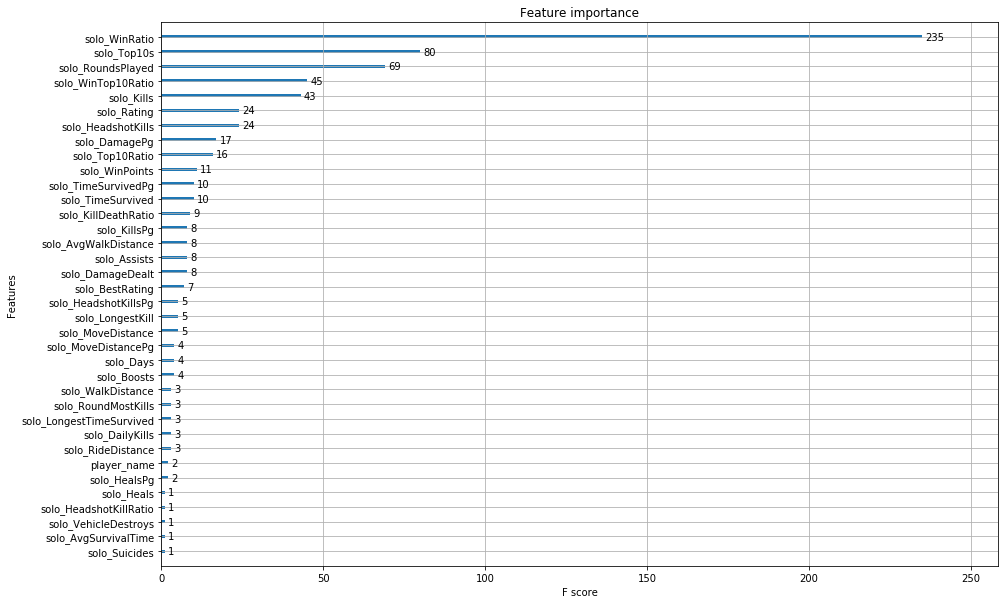

In [0]:
plt.rcParams['figure.figsize'] = [15, 10]
plt.figure(figsize=(20, 20))
xgb_plot_importance(xgb)

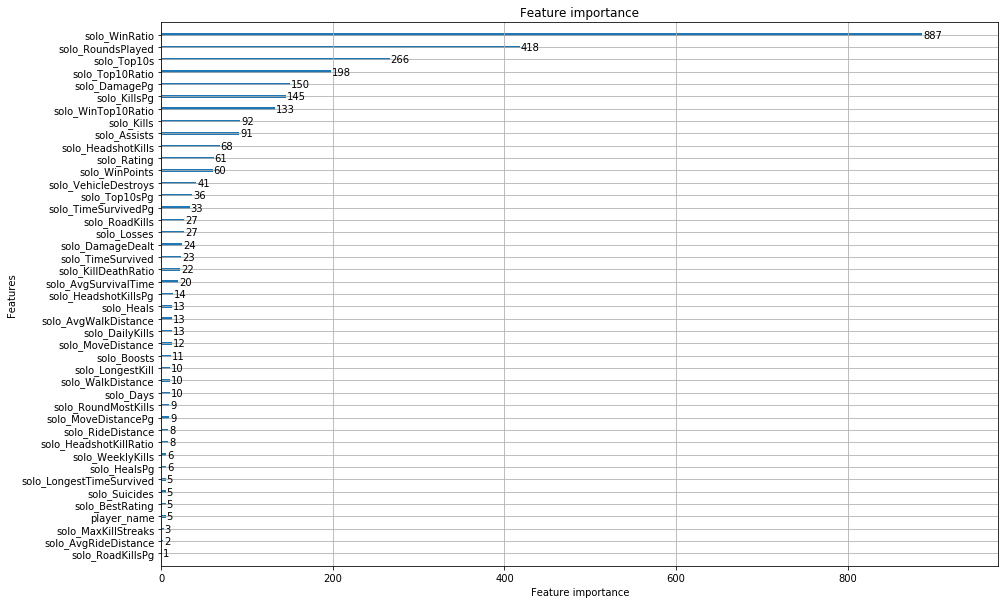

In [0]:
lgbm_plot_importance(LGBMRegressor().fit(X, y))

In [0]:
best_feat = list(zip(X.columns, lgbm.feature_importances_))
print(best_feat)
print("===============================================================================")
selected_features = []
for i in best_feat:
    if i[1] > 99:
        selected_features.append(str(i[0]))
print("List of top features \n{}".format(selected_features))

[('player_name', 5), ('solo_KillDeathRatio', 22), ('solo_WinRatio', 887), ('solo_TimeSurvived', 23), ('solo_RoundsPlayed', 418), ('solo_WinTop10Ratio', 133), ('solo_Top10s', 266), ('solo_Top10Ratio', 198), ('solo_Losses', 27), ('solo_Rating', 61), ('solo_BestRating', 5), ('solo_DamagePg', 150), ('solo_HeadshotKillsPg', 14), ('solo_HealsPg', 6), ('solo_KillsPg', 145), ('solo_MoveDistancePg', 9), ('solo_RoadKillsPg', 1), ('solo_TimeSurvivedPg', 33), ('solo_Top10sPg', 36), ('solo_Kills', 92), ('solo_Assists', 91), ('solo_Suicides', 5), ('solo_HeadshotKills', 68), ('solo_HeadshotKillRatio', 8), ('solo_VehicleDestroys', 41), ('solo_RoadKills', 27), ('solo_DailyKills', 13), ('solo_WeeklyKills', 6), ('solo_RoundMostKills', 9), ('solo_MaxKillStreaks', 3), ('solo_WeaponAcquired', 0), ('solo_Days', 10), ('solo_LongestTimeSurvived', 5), ('solo_MostSurvivalTime', 0), ('solo_AvgSurvivalTime', 20), ('solo_WinPoints', 60), ('solo_WalkDistance', 10), ('solo_RideDistance', 8), ('solo_MoveDistance', 12)

In [0]:
X = X[['solo_TimeSurvived', 'solo_RoundsPlayed', 'solo_Top10Ratio', 'solo_Losses', 'solo_MoveDistancePg', 'solo_TimeSurvivedPg', 'solo_Top10sPg', 'solo_Boosts']]
X['target_solo_Wins'] = y
X.head()

,solo_TimeSurvived,solo_RoundsPlayed,solo_Top10Ratio,solo_Losses,solo_MoveDistancePg,solo_TimeSurvivedPg,solo_Top10sPg,solo_Boosts,target_solo_Wins
0,18469.14,17,23.5,14,3321.28,1086.42,0.24,29,3
1,33014.86,33,33.3,27,5021.41,1000.45,0.33,88,6
2,4330.44,5,20.0,5,2804.80,866.09,0.20,3,0
3,13421.82,8,75.0,4,5986.82,1677.73,0.75,24,4
4,9841.04,6,83.3,4,6526.96,1640.17,0.83,21,2


In [0]:
X.to_csv('/content/drive/My Drive/Colab Notebooks/PUBG/processed_data_pubg.csv')